# Exploratory Data Analysis and Predicting Price of Airbnb Listings in NYC

The following notebook showcases my analysis of AirBnb listings dataset posted on Kaggle. The listings were true as of July 8, 2019 and are specific to New York City, NY. 

Link to the dataset: https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data

The objective of the analysis is to:

 - Understand the relationships between the different variables in the dataset; specifically their individual or combined impact on price of a listing
 - Display the details visually to understand distributions, and spread

## Data Preparation and Cleanup

In [ ]:
#Import libraries
import pandas as pd
%matplotlib inline 

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
#Import dataset
airbnb_data = pd.read_csv('../Data/AB_NYC_2019.csv')

In [19]:
airbnb_data.sample(5)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
32533,25503835,Hidden Gem in Canarsie-FREE private parking,192464234,Rodolfo,Brooklyn,Canarsie,40.64516,-73.89684,Entire home/apt,100,1,95,2019-07-08,7.77,1,124
40344,31287498,Cozy Clean 1BR 10min to LGA/Flushing,234147066,Layla,Queens,College Point,40.77981,-73.84242,Entire home/apt,69,1,19,2019-06-22,3.93,1,212
20541,16338454,Cozy & Sunlit Three Bedroom Apartment,5828836,Dana,Manhattan,Harlem,40.82548,-73.94983,Entire home/apt,255,2,1,2017-01-01,0.03,1,0
7085,5113910,Designer's Red Hook Apartment,10125456,Carly,Brooklyn,Red Hook,40.67404,-74.01021,Entire home/apt,115,5,51,2019-05-15,0.95,1,8
28294,22000255,"Cozy private room, 10 mins away from Central P...",157728550,Kem,Manhattan,East Harlem,40.80219,-73.94383,Private room,150,1,107,2019-06-25,5.55,2,365


In [21]:
#Understanding data types
airbnb_data.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [22]:
#convert columns to datetime
airbnb_data['last_review'] = pd.to_datetime(airbnb_data['last_review'])

In [33]:
#Understanding dataset shape (rows x columns)
airbnb_data.shape

(48895, 16)

In [31]:
#Identifying null values in the data
airbnb_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

#### Decision regarding null values
We have 4 columns with null values; as we do not require them as part of our analysis, we can simply choose to drop these columns or leave them as is. In this case, I simply leave columns without dropping any.

## Exploratory Data Analysis

#### As a tourist, let's begin by asking if we are more likely to find a certain type of room in a certain NYC Borough

Let's try to understand the distribution of the different 'room_type' across the different 'neighbourhood_group' in the dataset

In [43]:
#Creating a table
neighborhood_room_dist = pd.crosstab(index = airbnb_data['neighbourhood_group'],
                                     columns = airbnb_data['room_type'],
                                     normalize = False)
neighborhood_room_dist

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,379,652,60
Brooklyn,9559,10132,413
Manhattan,13199,7982,480
Queens,2096,3372,198
Staten Island,176,188,9


##### Let's visualize the above table to understand the numbers better

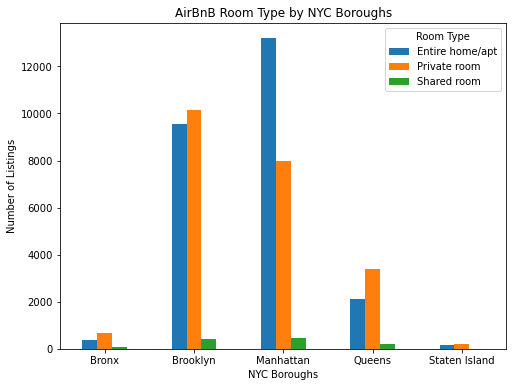

In [115]:
#Creating a plot
neighborhood_room_dist.plot(kind = 'bar',
                            title = 'AirBnB Room Type by NYC Boroughs',
                            figsize = (8,6))
#Rotating the xticks
plt.xticks(rotation = 0)
#X-axis name: NYC Boroughs
plt.xlabel('NYC Boroughs')
#Y-axis name: Number of Listings
plt.ylabel('Number of Listings')
#Legend Title
plt.legend(title='Room Type')

Using the above table to understand the distribution of the various room type's across the different neighborhood's, we can infer the following:
- Manhattan has the most number of single apartments available
- Brooklyn has the most number of Private rooms

### A second question we would like to look at is whether a particular room type is priced differently in different neighborhoods of NYC?

In [57]:
price_by_neighborhood_room = airbnb_data.pivot_table(index = 'neighbourhood_group',
                                                    columns = 'room_type',
                                                    values = 'price',
                                                    aggfunc = 'mean').round(2)
price_by_neighborhood_room

room_type,Entire home/apt,Private room,Shared room
neighbourhood_group,,,
Bronx,127.51,66.79,59.80
Brooklyn,178.33,76.50,50.53
Manhattan,249.24,116.78,88.98
Queens,147.05,71.76,69.02
Staten Island,173.85,62.29,57.44


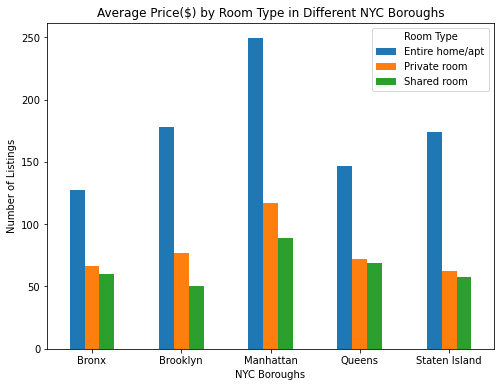

In [119]:
#Creating a Plot
price_by_neighborhood_room.plot(kind = 'bar',
                                title = 'Average Price($) by Room Type in Different NYC Boroughs',
                                figsize = (8,6))
#Rotating the xticks
plt.xticks(rotation = 0)
#X-label: NYC Boroughs
plt.xlabel('NYC Boroughs')
#Y-label: Number of Listings
plt.ylabel('Number of Listings')
#Legend Title
plt.legend(title = 'Room Type')

Using the table and the visual above, we can infer the following:
- The average cost of an Airbnb is the highest in Manhattan across all room types
- The average cost of a private room in Queens is similar to that in Brooklyn
(This could be due to the approximate similar commute times from Queens and Brooklyn to Manhattan)
- The average cost of a shared room in Brooklyn is less than that of a shared room in Bronx
(This is a surprise, as one would expect room prices in Brooklyn to be higher than that in Bronx)

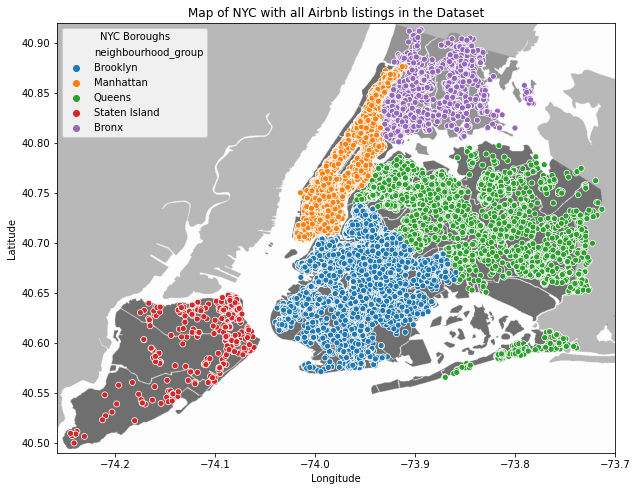

In [74]:
newyorkcity = plt.imread('../Data/New_York_City_.png', 0)

# Graph size
plt.figure(figsize=(10,8))

# Graph and image settings
plt.imshow(newyorkcity, zorder=0, extent=[-74.258, -73.7, 40.49,40.92])

# When an image is included, use it.
ax = plt.gca()

# X: longitude, Y: latitude, Color based on Neighbourhood Groups(Boroughs)
sns.scatterplot(x = 'longitude', 
                y = 'latitude',
                hue = 'neighbourhood_group',
                data = airbnb_data)
                
# X-axis name: longitude
plt.xlabel('Longitude')
# Y-axis name: latitude
plt.ylabel('Latitude')

plt.title('Map of NYC with all Airbnb listings in the Dataset')
plt.legend(title = 'NYC Boroughs')

# Graph drawing
plt.show()

In [103]:
listings_per_neighbourhood = airbnb_data.groupby('neighbourhood').size()
listings_per_neighbourhood = listings_per_neighbourhood[listings_per_neighbourhood > 1000].sort_values(ascending = False)

Text(0, 0.5, 'Number of listings')

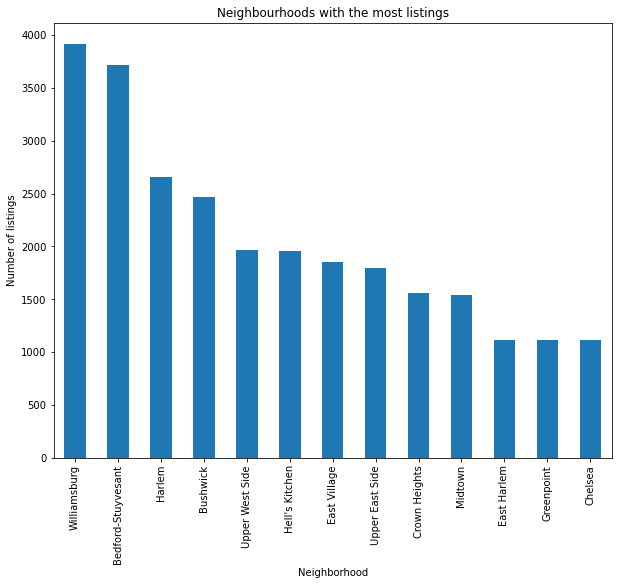

In [104]:
listings_per_neighbourhood.plot(kind = 'bar',
                                title = 'Neighbourhoods with the most listings',
                                figsize = (10,8))
plt.xlabel('Neighborhood')
plt.ylabel('Number of listings')

Williamsburg has the most number of listings when compared to other neighborhoods.

In [112]:
airbnb_data.groupby(['neighbourhood_group','room_type']).agg({'availability_365':'median'}).round(2)


availability_365
neighbourhood_group room_type                        
Bronx               Entire home/apt             131.0
                    Private room                157.0
                    Shared room                  89.0
Brooklyn            Entire home/apt              28.0
                    Private room                 24.0
                    Shared room                 156.0
Manhattan           Entire home/apt              42.0
                    Private room                 29.0
                    Shared room                  81.0
Queens              Entire home/apt              89.0
                    Private room                108.0
                    Shared room                 175.5
Staten Island       Entire home/apt             176.5
                    Private room                282.0
                    Shared room                  37.0

On average, our highest chances of finding a listing available on Airbnb would be in Staten Island followed by Bronx. This inference would seem intutitive as the commute time from Staten Island and Bronx to the tourist areas of the city would be the greatest.